<h1 style="background-color:Green;font-size:36pt;color:white">Decision Tree</h1>

## Giusseppe Benito Bervis Quintero
### León, Nicaragua - 2022

# Importing needed packages

In [60]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# Uploading packages for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot']) # optional: for ggplot-like style

from sklearn import preprocessing 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# About the dataset

A medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

We want to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, the Cholesterol and Urinary sodium-to-potassium ratio of the patients, and the target is the drug that each patient responded to.

# Downloading Data

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv')

# Take a look at the dataset
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# Exploring Data

Displaying the datatypes of the columns

In [4]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

We will make a change on Sez, BP and Cholesterol features, because Sklearn Decision Trees does not handle categorical variables. This will make later.

Checking the number of rows and columns

In [5]:
df.shape

(200, 6)

The dataset has 200 rows and 6 features.

Checking missing values

In [6]:
df.isnull().sum().sum()

0

There is not any missing value in the dataset.

Let’s see how many of each class is in our dataset

In [10]:
# Counting number of costumers by every class
# Sorting indexes
Df_ = df['Drug'].value_counts().sort_index()

Df_

drugA    23
drugB    16
drugC    16
drugX    54
drugY    91
Name: Drug, dtype: int64

# Preprocessing

Using <b>df</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


In [11]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

Converting Panda data frame to a Numpy array, tu use scikit_learn library.

In [49]:
# Predictor features
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

# Response feature
y = df['Drug'].values

There are some features in this dataset that are categorical, such as **Sex** or **BP**. Unfortunately, as we say before,  Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values.

In [50]:
# Transforming sex feature into a numerical feature
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[:, 1] = le_sex.transform(X[:, 1])

# Transforming BP feature into a numerical feature
le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
X[:, 2] = le_BP.transform(X[:, 2])

# Transforming Cholesterol feature into a numerical feature
le_Cholesterol = preprocessing.LabelEncoder()
le_Cholesterol.fit(['HIGH', 'NORMAL'])
X[:, 3] = le_Cholesterol.transform(X[:, 3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

## Creating train and test dataset

In [52]:
# Splitting the data into train and test sets
# Taking 70% as trainning set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (140, 5) (140,)
Test set: (60, 5) (60,)


# Classification

## Appliying Decision Trees Algorithm

The DecisionTree's Accuracy:  0.9833333333333333


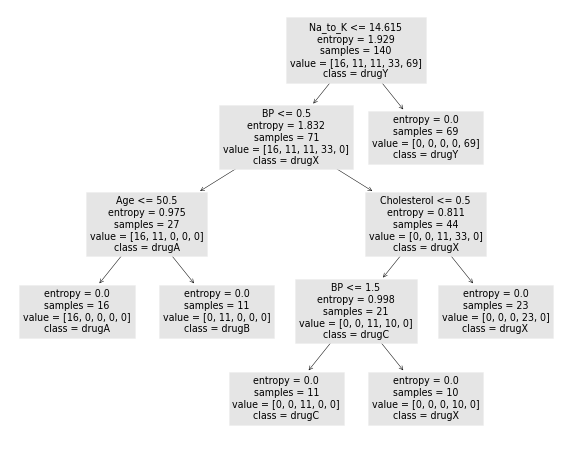

In [77]:
# Creating instance of the DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

# Training model
drugTree.fit(X_train, y_train)

# Making predictions
predTree = drugTree.predict(X_test)

# Evaluating accuracy
print("The DecisionTree's Accuracy: ", metrics.accuracy_score(y_test, predTree))

# Plotting
plt.figure(figsize=(10, 8))
tree.plot_tree(drugTree, feature_names = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], class_names = drugTree.classes_)
plt.show()